<h2 align="center">Analysis of the No-Show Appointment Dataset</h2>

**Contents**
#### <a href="#intro">Introduction</a>
#### <a href="#wrangling">Data Wrangling</a>
   * <a href="#properties">General Properties</a>
   * <a href="#cleaning">Data Cleaning</a>
#### <a href="#eda">Exploratory Data Analysis</a>
   * <a href="#q1">Research Question 1</a>
   * <a href="#q2">Research Question 2</a>
   * <a href="#q3">Research Question 3</a>
#### <a href="#conclusions">Conclusions</a>

<a id='intro'></a>
## Introduction

The dataset being analysed, contains 110,527 samples of medical appointments in Brazil. There are 14 variables. Though most variable name are self-explanatory, descriptive phrases, boolean values or both, for each variable are stated below for clarification.

1. `PatientId` - identification of a patient.
2. `AppointmentID` - identification of each appointment.
3. `Gender` - male (M) or female (F).
4. `ScheduledDay` - the day someone called or registered the appointment before the appointment at the hospital.
5. `AppointmentDay` - the day of the actuall appointment, when they have to visit the doctor.
6. `Age` - patient age.
7. `Neighbourhood` - where the hospital is located.
8. `Scholarship` - whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
9. `Hipertension` - True or False.
10. `Diabetes`  - True or False.
11. `Alcoholism` - True or False.
12. `Handcap` - True or False.
13. `SMS_received` - 1 or more messages sent to the patient - True or False.
14. `No-show` - whether the appointment was a no-show (patient did not show up) one or not - True or False.

In analysing this dataset, the questions below are asked;
* What is the impact of gender on No_show? Did any of the Gender (F/M) show up better for appoints?
* Did Age have any impact on the making or not making of appointment by Females and Males?
* Which neighbourhood had extreems of the No_show category Yes or No and what proportion made appointments?

To answer the question above, the relationship between No_show variable as dependent variable and the listed variables below as independent variables, are explored;
* _Dependent variable_
    * No-show
* _Independent variable_
    * Gender
    * Age
    * Neighborhood


In [1]:
# import statements for needed packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
<h2>Data Wrangling</h2>

<a id='properties'></a>
<h4>General Properties</h4>

In [2]:
# Load data into dataframe and display first five rows
df  = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


An initial observation from the dataframe head, shows the column names are not in uniform, and also contain a spelling error in _"Handcap"_ instead of _"Handicap"_. These will be correted during the data cleaning process.

In [3]:
# get the dimension of the data
df.shape

(110527, 14)

In [4]:
# check properties of the feilds
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Apart from the PatientId field, which most likely will be dropped since we are not interested in identifying a patient, the data is made up majorly of only two data types; strings and integers.

A corresponding numeric column is added to the dataframe below, to enable passing it in a correlation matrix with other dataframe variables.

In [5]:
# create numeric corresponding column to No-show for correlation coefficient
df['No_show_numeric'] = df.apply(lambda row: 1 if row['No-show'] == "Yes" else 0, axis=1)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,No_show_numeric
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


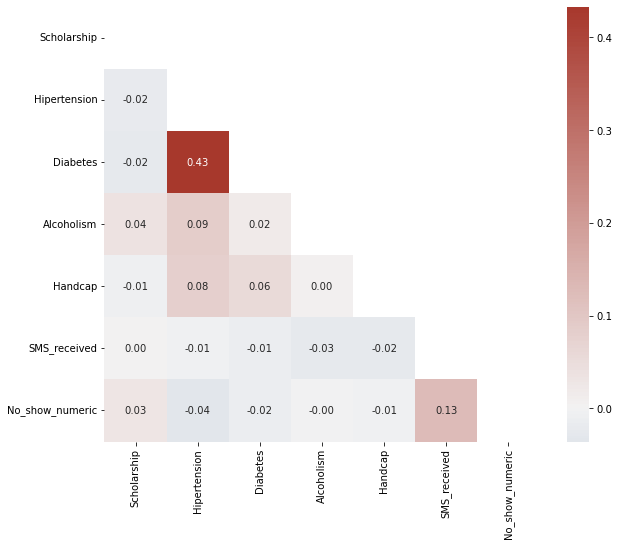

In [6]:
#calculate correlation  matrix
matrix = df[['Scholarship','Hipertension','Diabetes',
             'Alcoholism','Handcap','SMS_received','No_show_numeric']].corr()

plt.figure(figsize=(10,8))

mask = np.triu(np.ones_like(matrix, dtype=bool))

cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9,
                             center="light", as_cmap=True)

sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='.2f',
            square=True, cmap=cmap);

Judging from the correlation matrix above, there is a moderate correlation between the Diabetes variable and Hipertension vairable. Outside that, the correlation between variables are weak and negative.

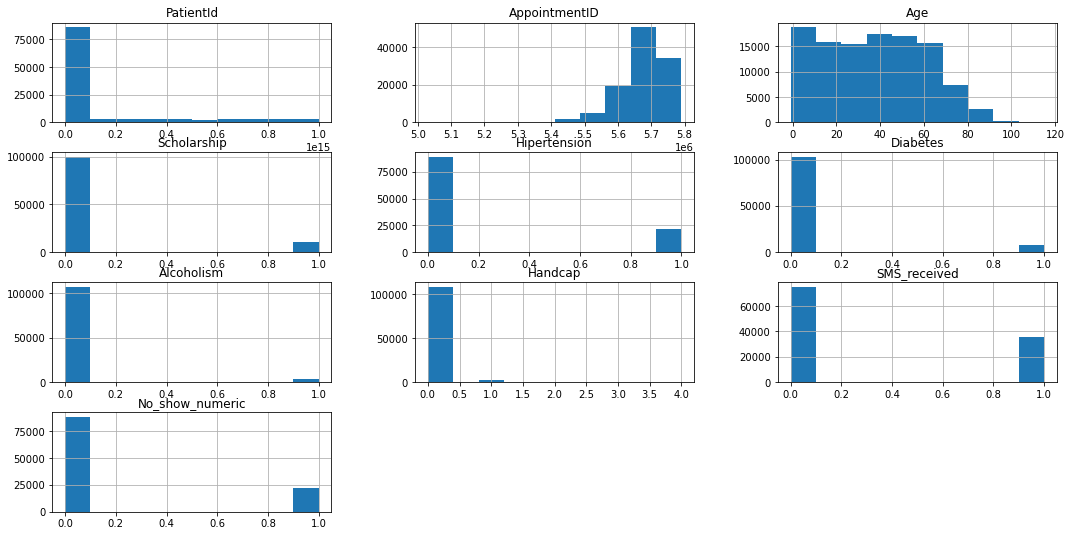

In [7]:
# plotting the dataframe to see the spread of numeric feature variables
df.hist(figsize=(18,9));

By looking out the histograms above, produced from the data, it can be observed that some of the fields have errors that are difficult to make judgement about. This is because there is no information on the data collection process and what might have generated the error.

The Age variable contains 3,539 rows of zero (0) in value. This could imply age is unknown or it could be the ages of babies who are not up to a year old and have appointment booked for them. Whichever it is, one cannot tell by just looking at the values.

In [8]:
# checking number of zero in Age column
df.query('Age == 0')['Age'].value_counts()

0    3539
Name: Age, dtype: int64

The Alcoholism column can be used to get an insight into if records having Age as zero can be considered babies alone or they include adults.

One could reason, If all rows with Yes (1) in the Alcoholism column have any or some of their corresponding field in Age column as zero, there's likely a data entry error, but if there are no corresponding field in Age column having zero when Alcoholism is 1, then one can accept that zero in the Age column implies babies who are less than a year old. The reason for this check is that it is not ethically or medically possible that babies who are not up to one year of age can suffer [alchoholism](https://en.wikipedia.org/wiki/Alcoholism) and as an effect not show up for a medical appointment.

In [9]:
# get number of records where Alcoholism is No and Age is zero
df.query('Alcoholism == 0 & Age == 0').shape[0]

3539

In [10]:
# get number of records where Alcoholism is Yes and Age is zero
df.query('Alcoholism == 1 & Age == 0').shape[0]

0

From the check above, all records having Age as zero, do not correspond with records having Alchoholism as yes (1). So it's more likely the zero in Age column represent babies who are not up to a year old. Hence, more useful to make use of these values as they are when considering the Age vairable for analysis, rather than replacing them with the mean of the column as an alternative.

In [11]:
# check for rows with negative age
df.query('Age < 0')['Age'].value_counts()

-1    1
Name: Age, dtype: int64

There is only a record with negative age. The row containing this record will be dropped during the data cleaning process.

In the dataset description online at Kaggle.com, `Handcap` variable is stated to have True (1) or False (0) values but from the histogram, it can be observed that there are other values. Calling the unique function on the `Age` column as done below, confirms the column contains five unique values ranging from 0 to 4. This makes this variable unreliable and a column to drop.

In [12]:
# checking Handcap column unique values
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [13]:
# get a statiscal description of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show_numeric
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [14]:
# check for number of missing items
df.isna().sum()

PatientId          0
AppointmentID      0
Gender             0
ScheduledDay       0
AppointmentDay     0
Age                0
Neighbourhood      0
Scholarship        0
Hipertension       0
Diabetes           0
Alcoholism         0
Handcap            0
SMS_received       0
No-show            0
No_show_numeric    0
dtype: int64

The check above indicates that there are no missing values in the data. A check for duplicated rows in the data is done below.

In [15]:
# ceheck for duplicated rows
sum(df.duplicated())

0

Check indicates there are no duplicate columns. This implies each sample is a unique hospital appointment. To further confirm this, a duplicate check on the appointment column alone, is done below. An output of zero implies all samples are unique appointments.

In [16]:
sum(df[['AppointmentID']].duplicated())

0

<a id='cleaning'></a>
#### Data Cleaning

To begin cleaning, some column names are renamed to reflect a uniform name format.

In [17]:
# column rename for uniformity
df.rename(columns = {'AppointmentID':'AppointmentId', 'Hipertension':'Hypertension',
                     'No-show':'No_show'}, inplace = True)
df.columns.values

array(['PatientId', 'AppointmentId', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No_show', 'No_show_numeric'], dtype=object)

Since we are not interested in patient identity, the PatientId column will be droped. The Handcap column will also be dropped due to values not coreesponding to the dataset description for the variable.

In [18]:
df.drop(columns=['PatientId','Handcap','No_show_numeric'], inplace=True)
df.head(1)

,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No_show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No


In [19]:
# get index of row with negative age value
neg_age_idx = df.query('Age < 0').index

# drop rows with negative Age value
df.drop(index=neg_age_idx, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
#### Research Question 1  - What is the impact of gender on No_show? Did any of the Gender (F/M) show up better for appointments?

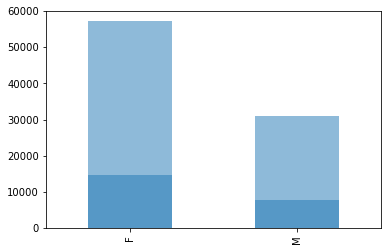

In [20]:
# plot both categories that showed up for appoitment, by Gender
df.query('No_show == "No"')['Gender'].value_counts().plot.bar(alpha=0.5)
df.query('No_show == "Yes"')['Gender'].value_counts().plot.bar(alpha=0.5);

From the plot above, it seemed greater females showed up for their appointment in comparison to their male counterpart. Also, more females did not show up in comparison to males. This accounts for greater number of females than males in the dataset. To better understand this pattern, their proportions are considered below.

In [21]:
# total number of No_show (No) males
total_males = df.query('Gender == "M"')['Gender'].value_counts().values[0]

# number of No_show (No) males
show_males = df.query('No_show == "No" & Gender == "M"')['Gender'].value_counts().values[0]

# proportion of No_show (No) males
prop_males = (show_males / total_males) * 100

In [22]:
# total number of No_show (No) females
total_females = df.query('Gender == "F"')['Gender'].value_counts().values[0]

# number of No_show (No) females
show_females = df.query('No_show == "No" & Gender == "F"')['Gender'].value_counts().values[0]

# proportion of No_show (No) females
prop_females = (show_females / total_females) * 100

Before plotting the first chart below with pyplot, a function is created to label the axis (x and y) and add diagram title to every plot henceforth. This is done for good coding practice.

In [23]:
def label(x, y, t):
    """
    Function labels the x and y axis, and the diagram title of a pyplot chart

    Args:
    x: (str): x-axis title
    y: (str): y-axis title
    t: (str): Diagram title

    Returns:
    None
    """

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

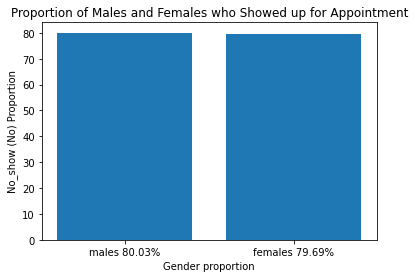

In [24]:
# concantenate values with labels
male_label = 'males ' + round(prop_males, 2).astype(str) + '%'
female_label = 'females ' + round(prop_females, 2).astype(str) + '%'

# plot proportion of No_show (No) female vs male
plt.bar([1, 2], [prop_males, prop_females],
        tick_label=[male_label, female_label])
label("Gender proportion", "No_show (No) Proportion",
      "Proportion of Males and Females who Showed up for Appointment")

From the plot above, it can be seen that more males showed up for their appointments, compared to females. A plot of the proportion of those who did not show up, done below, corresponds.

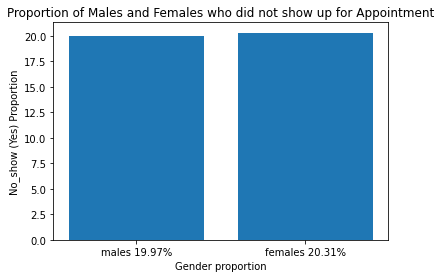

In [25]:
# number of No_show (Yes) males
no_show_males = df.query('No_show == "Yes" & Gender == "M"')['Gender'].value_counts().values[0]

# proportion of No_show (Yes) males
prop_males = (no_show_males / total_males) * 100

# number of No_show (Yes) females
no_show_females = df.query('No_show == "Yes" & Gender == "F"')['Gender'].value_counts().values[0]

# proportion of No_show (Yes) females
prop_females = (no_show_females / total_females) * 100

# concantenate values with labels
male_label = 'males ' + round(prop_males, 2).astype(str) + '%'
female_label = 'females ' + round(prop_females, 2).astype(str) + '%'

# plot proportion of No_show (Yes) female vs male
plt.bar([1, 2], [prop_males, prop_females],
        tick_label=[male_label, female_label])
label("Gender proportion", "No_show (Yes) Proportion",
      "Proportion of Males and Females who did not show up for Appointment")

<a id='q2'></a>
#### Research Question 2 - Did Age have any impact on the making or not making appointment by Females and Males?

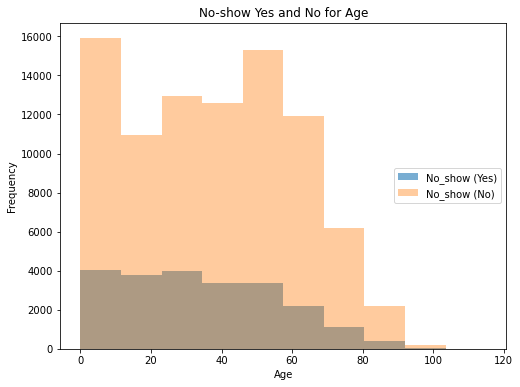

In [26]:
# distribution plot of No_show Yes and No for the Age coloumn
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(df.query('No_show == "Yes"').Age, alpha=0.6, label='No_show (Yes)')
ax.hist(df.query('No_show == "No"').Age, alpha=0.4, label='No_show (No)')
ax.set_title('No-show Yes and No for Age')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend(loc='center right');

From the chart above, one could see that the ages of those who showed up for their appointment at the hospital are quite similarly distributed to the ages of those who did not show up for thier appointments. The plot also shows that a greater number showed up for thier appointment.

A comparison is futher done below to understand the average age of males and females who showed up and those who did not show up, with general average age of both gender in the different situation.

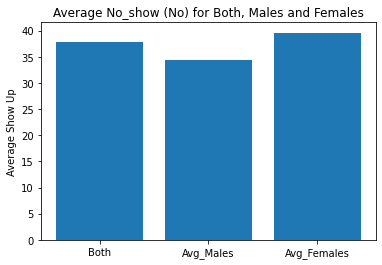

In [27]:
# average age of those who showed up i.e., No-show (No)
avg_age_show = df.query('No_show == "No"').Age.mean()

# average age of males who showed up
avg_age_show_m = df.query('No_show == "No" & Gender == "M"').Age.mean()

# average age of females who showed up
avg_age_show_f = df.query('No_show == "No" & Gender == "F"').Age.mean()

# plot bar chart of all three categories above
plt.bar([1, 2, 3], [avg_age_show, avg_age_show_m, avg_age_show_f],
        tick_label=['Both', 'Avg_Males', 'Avg_Females'])
label("", "Average Show Up", "Average No_show (No) for Both, Males and Females")

The plot above indicates, the average age of males who made thier appointments is lower the average age of females who made their appointments. This implies, younger males than females made their appointment.

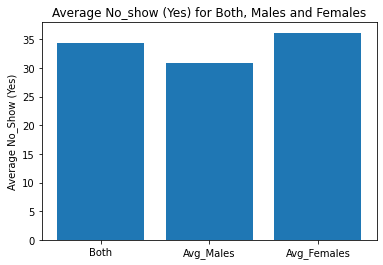

In [28]:
# average age of those who did not show up i.e., No-show (Yes)
avg_age_no_show = df.query('No_show == "Yes"').Age.mean()

# average age of males who did not show up
avg_age_no_show_m = df.query('No_show == "Yes" & Gender == "M"').Age.mean()

# average age of females who did not show up
avg_age_no_show_f = df.query('No_show == "Yes" & Gender == "F"').Age.mean()

# plot bar chart of all three categories above
plt.bar([1, 2, 3], [avg_age_no_show, avg_age_no_show_m, avg_age_no_show_f],
        tick_label=['Both', 'Avg_Males', 'Avg_Females'])
label("", "Average No_Show (Yes)", "Average No_show (Yes) for Both, Males and Females")

Comparing the plot above with the one before it, it appears the males who were booked for appointments at the hospital are generally younger than the females booked for appointment. This is because, on both diagrams, it can be seen that the average age of males is lower than that of females for both category (No_show Yes and No).

<a id='q3'></a>
#### Research Question 3 - Which neighbourhood had extreems of the No_show category Yes or No and what proportion made appointments?

This question considers the impact of the neighborhood variable on No-show from the point of showing up for appointmnets. To answer this question, it will be useful to know the number of neighbourhoods in the data.

In [29]:
# get the number of unique values in the neighbouhood column
df.Neighbourhood.nunique()

81

There are 81 neighbourhoods in the dataset. Due to the large number of neighborhood, the No_show categories (Yes/No) will be grouped according to neighborhood variable, and then the neighborhoods where the highest and lowest values fall and category (Yes/No) will be selected.

In [30]:
# get Neighbourhood and No_show category with maximum value
df.groupby('Neighbourhood')['No_show'].value_counts().idxmax()

('JARDIM CAMBURI', 'No')

In [31]:
# calcultate proportion of appointments that where showed up for
df_jardim = df.query('Neighbourhood == "JARDIM CAMBURI"')
jardim_show = df_jardim.query('No_show == "No"').No_show.value_counts()[0].astype(int)
jardim_no_show = df_jardim.query('No_show == "Yes"').No_show.value_counts()[0].astype(int)
jardim_prop_show = (jardim_show / (jardim_show + jardim_no_show)) * 100
jardim_prop_show

81.01593883633537

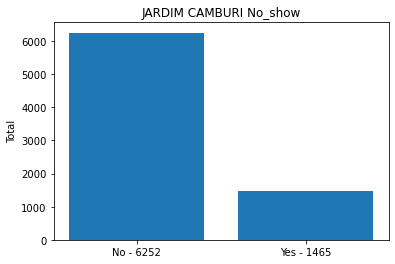

In [32]:
# plot JARDIM CAMBURI No_show totals
No_label = 'No - ' + jardim_show.astype(str)
Yes_label = 'Yes - ' + jardim_no_show.astype(str)

plt.bar([1, 2], [jardim_show, jardim_no_show],
        tick_label=[No_label, Yes_label])
label("", "Total", "JARDIM CAMBURI No_show")

The maximum number from the groupings by neighborhood came from JARDIM CAMBURI neighborhood, and it was a No_show No category. Interestingly, the proportion of those who made appointments in the JARDIM CAMBURI neighborhood was 81.02%.

In [33]:
# get Neighbourhood and No_show category with minimum value
df.groupby('Neighbourhood')['No_show'].value_counts().idxmin()

('AEROPORTO', 'Yes')

In [34]:
# calcultate proportion of appointments that where showed for
df_aeroporto = df.query('Neighbourhood == "AEROPORTO"')
aeroporto_show = df_aeroporto.query('No_show == "No"').No_show.value_counts()[0].astype(int)
aeroporto_no_show = df_aeroporto.query('No_show == "Yes"').No_show.value_counts()[0].astype(int)
aeroporto_prop_show = (aeroporto_show / (aeroporto_show + aeroporto_no_show)) * 100
aeroporto_prop_show

87.5

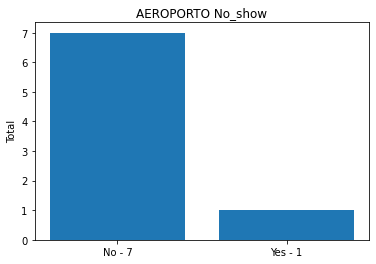

In [35]:
# plot AEROPORTO No_show totals
No_label = 'No - ' + aeroporto_show.astype(str)
Yes_label = 'Yes - ' + aeroporto_no_show.astype(str)

plt.bar([1, 2], [aeroporto_show, aeroporto_no_show],
        tick_label=[No_label, Yes_label])
label("", "Total", "AEROPORTO No_show")

The minimum number from the groupings by neighborhood came from AEROPORTO neighborhood, and it was a No_show Yes category. The proportion of those who made appointments in the JARDIM CAMBURI neighborhood was 87.5%.

<a id='conclusions'></a>
## Conclusions

This analysis of the No_show Appointment dataset, looked into the questions: What is the impact of gender on No_show? Did any of the Gender (F/M) show up better for appoints? Did Age have any impact on the making or not making of appointment by Females and Males? and Which neighbourhood had extreems of the No_show category Yes or No and what proportion made appointments?

The observations are as follows;

Males turn up better for appointment and were more younger than females who did so although, the dataset seem to contain more younger males than females.

The neighbohoods where the hospitals are located seem not to matter since the neighborhoods with lowest no-show and that with highest attendance both had proportionally high attendance to appointment.

The analysis done is not inferential since no statistical tests were conducted. There are other variables that need to be looked into in regards to their relationship with the target variable No-show. Also more questions that can be asked and analysed.
